In [4]:
#Importing
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [6]:
#Getting Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "NewDataa", labels='inferred', label_mode="categorical",class_names=['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo'],
    color_mode="grayscale", batch_size=32, image_size=(28, 28), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "NewDataa", labels='inferred', label_mode="categorical", class_names=['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo'],
    color_mode="grayscale", batch_size=32, image_size=(28, 28), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 1400 files belonging to 7 classes.
Using 1120 files for training.
Found 1400 files belonging to 7 classes.
Using 280 files for validation.


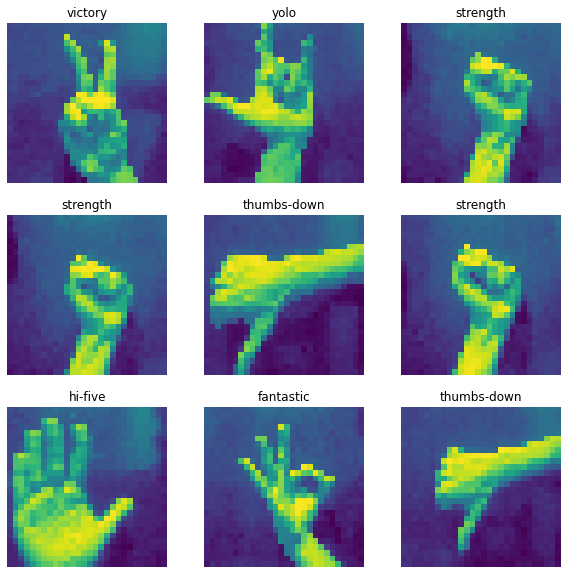

In [32]:
#Visiualizing Data
class_names = ['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo']
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i],axis=0)])
    plt.axis("off")

In [12]:
#Creating model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(28,28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

In [14]:
#Model compilation
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [ ]:
#Model summary
model.summary()

In [15]:
#Training model
fit = model.fit(train_data,validation_data=val_data,epochs=25)

Epoch 1/25
35/35 [==============================] - 94s 3s/step - loss: 6.3268 - accuracy: 0.2554 - val_loss: 1.5427 - val_accuracy: 0.4143
Epoch 2/25
35/35 [==============================] - 78s 2s/step - loss: 1.2025 - accuracy: 0.5491 - val_loss: 0.7053 - val_accuracy: 0.7821
Epoch 3/25
35/35 [==============================] - 98s 3s/step - loss: 0.4345 - accuracy: 0.8429 - val_loss: 0.1996 - val_accuracy: 0.9286
Epoch 4/25
35/35 [==============================] - 68s 2s/step - loss: 0.1724 - accuracy: 0.9438 - val_loss: 0.0947 - val_accuracy: 0.9607
Epoch 5/25
35/35 [==============================] - 86s 2s/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0364 - val_accuracy: 0.9929
Epoch 6/25
35/35 [==============================] - 69s 2s/step - loss: 0.0579 - accuracy: 0.9839 - val_loss: 0.0443 - val_accuracy: 0.9786
Epoch 7/25
35/35 [==============================] - 84s 2s/step - loss: 0.0433 - accuracy: 0.9893 - val_loss: 0.0203 - val_accuracy: 0.9893
Epoch 8/25
35/35 [==

In [33]:
#Data for plots
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)


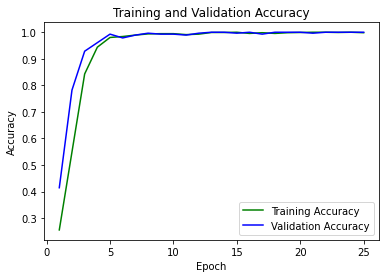

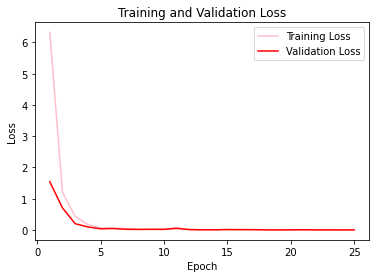

<Figure size 432x288 with 0 Axes>

In [34]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [35]:
#Saving model
model.save('NewModels/SignLanguageModelScratch.h5')

fantastic => 9.846723270245514e-18
hi-five => 8.24613100025573e-10
strength => 0.05474626645445824
thumbs-down => 0.0001891209976747632
thumbs-up => 3.2005965260907543e-13
victory => 0.9450384974479675
yolo => 2.6085172066814266e-05


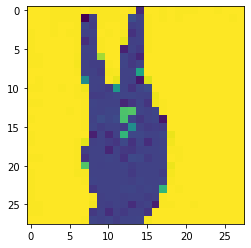

In [38]:
#Predicting images
def Predict_image(dir,model):
    img = image.load_img(dir,color_mode='grayscale',target_size=(28,28,1))
    ar = image.img_to_array(img)
    plt.imshow(ar)
    ar = np.expand_dims(ar,axis=0)
    pred = model.predict(ar)
    pred = pred.flatten()
    for i in range(0,len(class_names)):
        print("{} => {}".format(class_names[i],pred[i]))

Predict_image('Test_Set/images427.jpg',model)
